In [0]:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials


In [0]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)


In [0]:
# downloaded = drive.CreateFile({'id':'1PbAF8eJS_Qy36kMJLFKbs4Rxm33g6fo9'}) # replace the id with id of file you want to access
# downloaded.GetContentFile('chennai_reservoir_levels.csv')

In [0]:
# downloaded = drive.CreateFile({'id':'1sh9uagU5RVjmdlbFHorAovPOcLNUt9q5'}) # replace the id with id of file you want to access
# # downloaded.GetContentFile('chennai_reservoir_rainfall.csv')

In [2]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
configure_plotly_browser_state()
init_notebook_mode(connected=True)

import warnings
import itertools
# import numpy as np
# import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
# import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [252]:
df = pd.read_csv("C:/Users/Swaraj/Downloads/chennai-water-management/chennai_reservoir_levels.csv")
# furniture = df.loc[df['Category'] == 'Furniture']
df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y')

In [152]:
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-01-02,3.9,0.0,268.0,0.0
2,2004-01-03,3.9,0.0,267.0,0.0
3,2004-01-04,3.9,0.0,267.0,0.0
4,2004-01-05,3.8,0.0,267.0,0.0


In [153]:
df['Date'].min()

Timestamp('2004-01-01 00:00:00')

In [154]:
df['Date'].max()

Timestamp('2019-06-17 00:00:00')

In [155]:
df = df.sort_values('Date')

In [156]:
df.isnull().sum()

Date               0
POONDI             0
CHOLAVARAM         0
REDHILLS           0
CHEMBARAMBAKKAM    0
dtype: int64

In [157]:
df = df.groupby('Date')['POONDI','CHOLAVARAM','REDHILLS','CHEMBARAMBAKKAM'].sum().reset_index()

# ['REDHILLS']['CHEMBARAMBAKKAM']

In [158]:
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-01-02,3.9,0.0,268.0,0.0
2,2004-01-03,3.9,0.0,267.0,0.0
3,2004-01-04,3.9,0.0,267.0,0.0
4,2004-01-05,3.8,0.0,267.0,0.0


In [159]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2004-01-01', '2004-01-02', '2004-01-03', '2004-01-04',
               '2004-01-05', '2004-01-06', '2004-01-07', '2004-01-08',
               '2004-01-09', '2004-01-10',
               ...
               '2019-06-08', '2019-06-09', '2019-06-10', '2019-06-11',
               '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-15',
               '2019-06-16', '2019-06-17'],
              dtype='datetime64[ns]', name='Date', length=5647, freq=None)

In [161]:
a,b,c,d['2014':]

(Date
 2004-01-01       3.738710
 2004-02-01       4.568966
 2004-03-01      11.850323
 2004-04-01       5.576667
 2004-05-01       5.780645
 2004-06-01       5.956667
 2004-07-01       4.987097
 2004-08-01       2.464516
 2004-09-01       4.275000
 2004-10-01      21.941935
 2004-11-01     154.700000
 2004-12-01     698.106452
 2005-01-01     922.835484
 2005-02-01     732.603571
 2005-03-01     293.819355
 2005-04-01     241.383333
 2005-05-01     213.348387
 2005-06-01     251.730000
 2005-07-01     105.622581
 2005-08-01      82.445161
 2005-09-01      32.139333
 2005-10-01     392.785161
 2005-11-01    2375.613333
 2005-12-01    3029.129032
 2006-01-01    3184.161290
 2006-02-01    2912.892857
 2006-03-01    2288.516129
 2006-04-01    1862.433333
 2006-05-01    1603.451613
 2006-06-01    1066.600000
                  ...     
 2017-01-01     605.032258
 2017-02-01     800.535714
 2017-03-01     498.709677
 2017-04-01      94.366667
 2017-05-01      48.548387
 2017-06-01      24.63

In [179]:
c['2017':]

Date
2017-01-01     387.645161
2017-02-01     487.250000
2017-03-01     648.193548
2017-04-01     550.700000
2017-05-01     288.838710
2017-06-01      82.733333
2017-07-01       4.806452
2017-08-01      25.483871
2017-09-01     114.366667
2017-10-01     331.258065
2017-11-01    1319.566667
2017-12-01    1659.548387
2018-01-01    1480.000000
2018-02-01    1273.750000
2018-03-01    1385.967742
2018-04-01    1804.900000
2018-05-01    1610.387097
2018-06-01    1268.733333
2018-07-01    1020.387097
2018-08-01     824.903226
2018-09-01     598.733333
2018-10-01     565.967742
2018-11-01     981.833333
2018-12-01    1046.129032
2019-01-01     834.000000
2019-02-01     623.357143
2019-03-01     414.419355
2019-04-01     216.233333
2019-05-01      45.548387
2019-06-01       1.411765
Freq: MS, Name: REDHILLS, dtype: float64

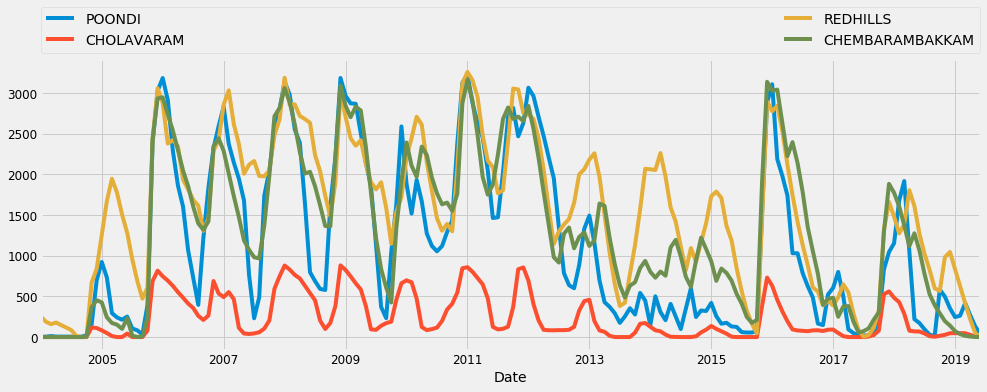

In [166]:
a.plot(figsize=(15,5), label ="POONDI")
b.plot(figsize=(15,5), label ="CHOLAVARAM")
c.plot(figsize=(15,5), label ="REDHILLS")
d.plot(figsize=(15,5), label ="CHEMBARAMBAKKAM")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.show()

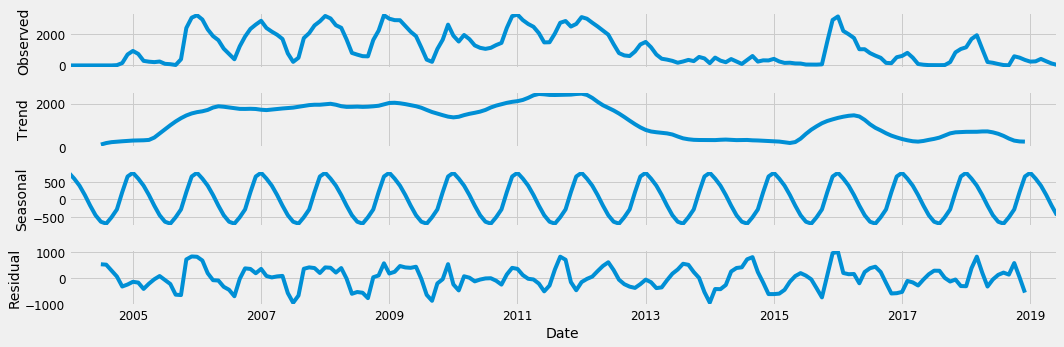

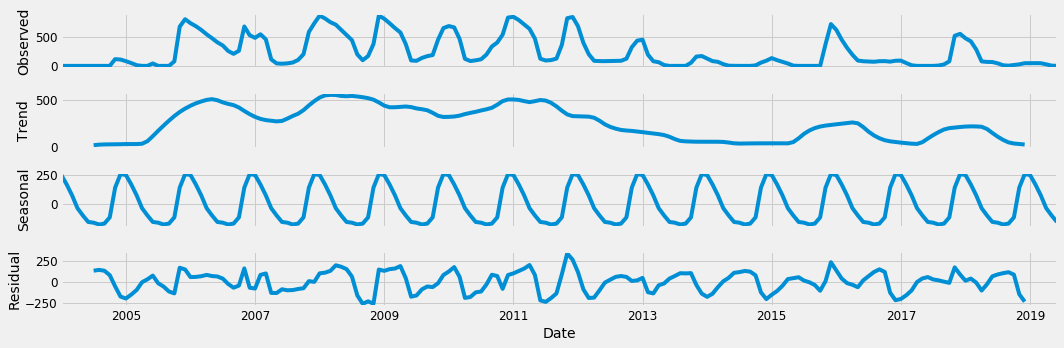

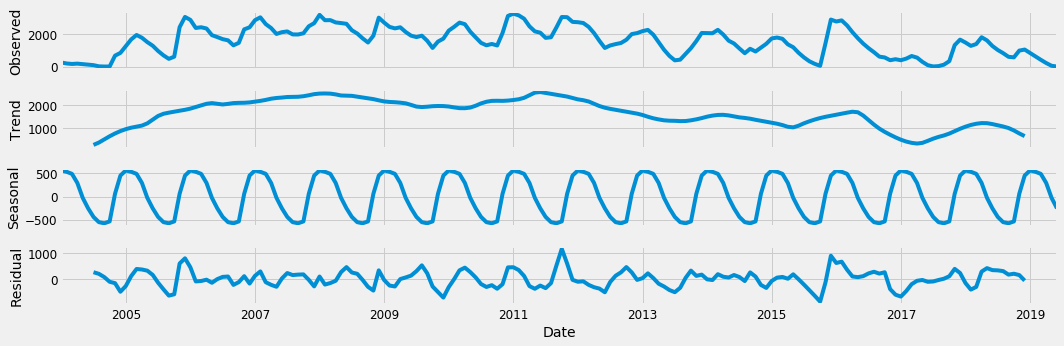

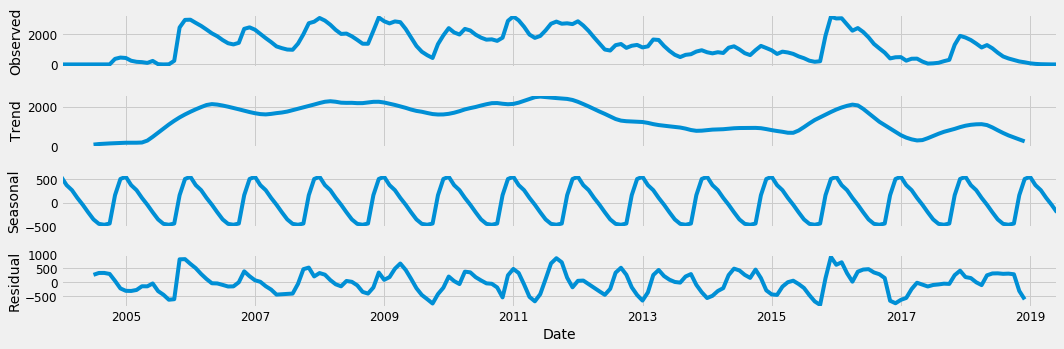

In [167]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

decomposition_a = sm.tsa.seasonal_decompose(a, model='additive')
decomposition_b = sm.tsa.seasonal_decompose(b, model='additive')
decomposition_c = sm.tsa.seasonal_decompose(c, model='additive')
decomposition_d = sm.tsa.seasonal_decompose(d, model='additive')

fig_a = decomposition_a.plot()
fig_b = decomposition_b.plot()
fig_c = decomposition_c.plot()
fig_d = decomposition_d.plot()
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)

plt.show()

In [168]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [169]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(a,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            pass
        
        try:
            mod = sm.tsa.statespace.SARIMAX(b,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            pass
        
        try:
            mod = sm.tsa.statespace.SARIMAX(c,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            pass
        try:
            mod = sm.tsa.statespace.SARIMAX(d,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3238.476643441529
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2707.190999425875
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3300.791803236353
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4.837877066426893
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2943.9396096224737
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2481.062078739433
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2979.935292376942
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2874.1388111971683
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2432.766024382322
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2822.631990904117
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2651.5527073574403
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2211.5379113364475
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2578.706205921015
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2875.10508659698
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2423.2010170739395
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2832.7946004219384
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2853.3480508450903
ARIMA(0, 0, 0)x(1,

C:\Users\Swaraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2622.0884568404654
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2208.101579168456
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2574.0893372377104
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2363.773429476727
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1958.2154110464735
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2289.5999810339854
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2570.2133172201593
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2157.9759759163217
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2517.112316910084
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2532.2850017740507
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2100.757080020276
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2462.341127732923
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2404.981062932884
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1980.202262489368
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2316.646113130434
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2365.311464984472
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1959.9560624835844
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2289.426872030811
AR

In [174]:
mod_a = sm.tsa.statespace.SARIMAX(a,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_a = mod_a.fit()

mod_b = sm.tsa.statespace.SARIMAX(b,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_b = mod_b.fit()

mod_c = sm.tsa.statespace.SARIMAX(c,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_c = mod_c.fit()

mod_d = sm.tsa.statespace.SARIMAX(d,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_d = mod_d.fit()

print(results_a.summary().tables[1])
print(results_b.summary().tables[1])
print(results_c.summary().tables[1])
print(results_d.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1192      0.220     -0.542      0.588      -0.550       0.312
ma.L1          0.4631      0.183      2.525      0.012       0.104       0.823
ar.S.L12       0.0601      0.073      0.824      0.410      -0.083       0.203
ma.S.L12      -1.0025      4.551     -0.220      0.826      -9.923       7.918
sigma2      1.105e+05   5.06e+05      0.218      0.827   -8.82e+05     1.1e+06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1655      0.329     -0.504      0.614      -0.810       0.479
ma.L1          0.4609      0.313      1.470      0.141      -0.153       1.075
ar.S.L12      -0.0148      0.066     -0.224      0.823      -0.144       0.115
ma.S.L12      -1.0000      0.074    -13.519      0.0

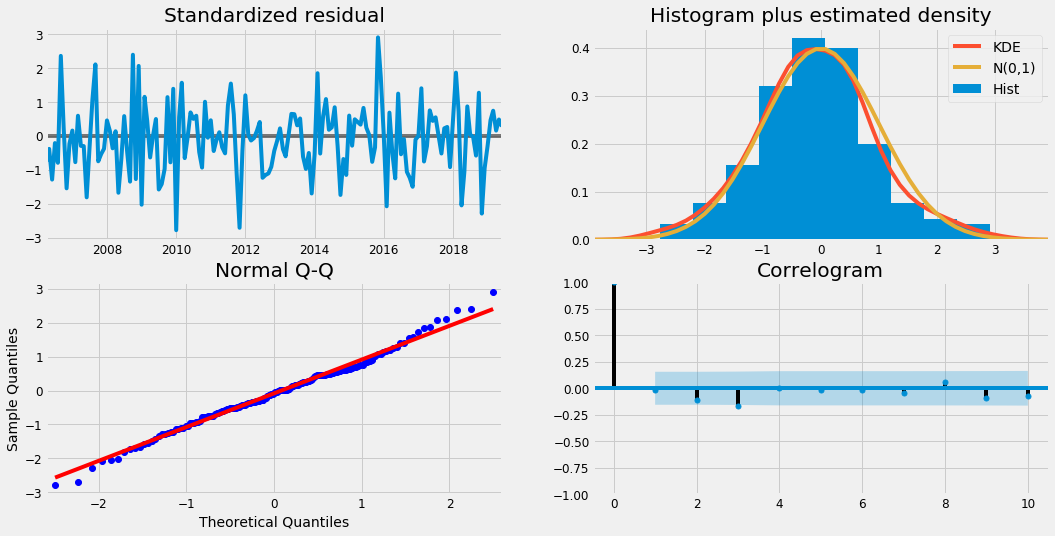

In [180]:
results_a.plot_diagnostics(figsize=(16, 8))
plt.show()

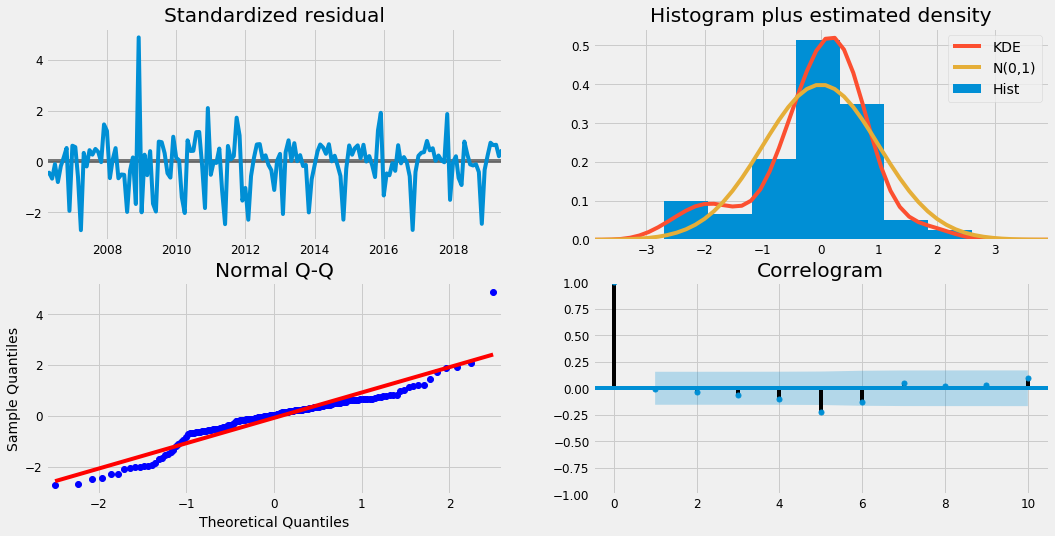

In [181]:
results_b.plot_diagnostics(figsize=(16, 8))
plt.show()

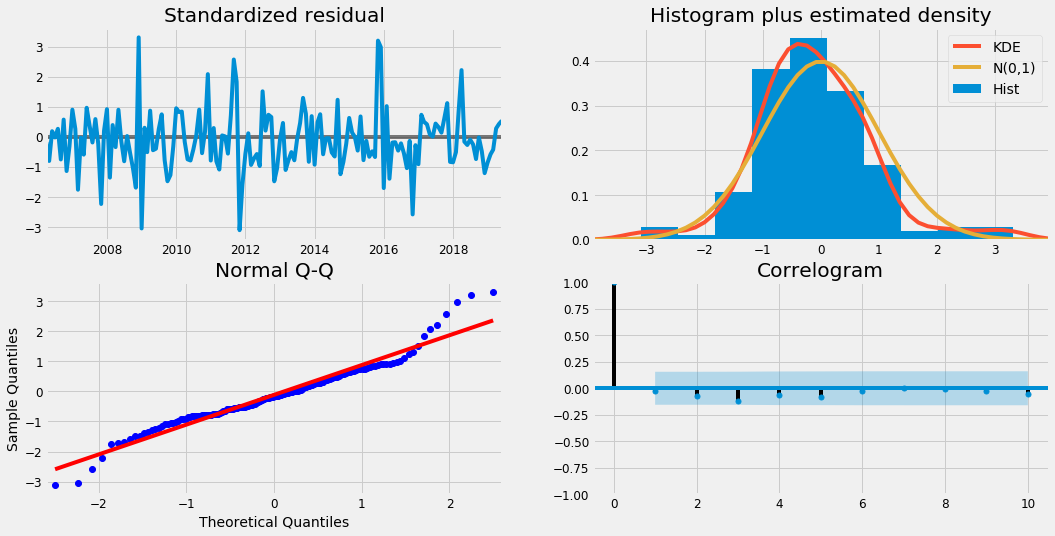

In [182]:
results_c.plot_diagnostics(figsize=(16, 8))
plt.show()

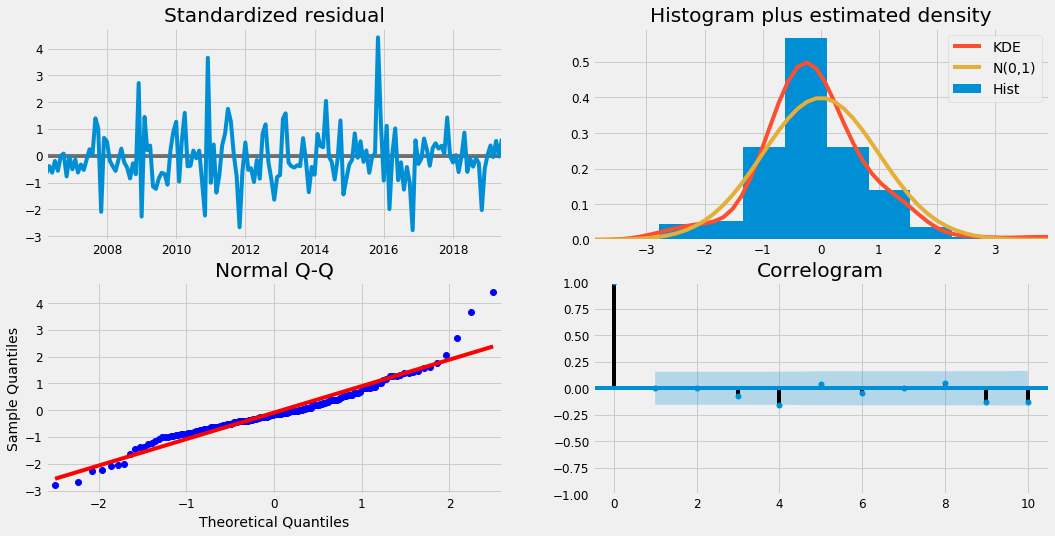

In [183]:
results_d.plot_diagnostics(figsize=(16, 8))
plt.show()

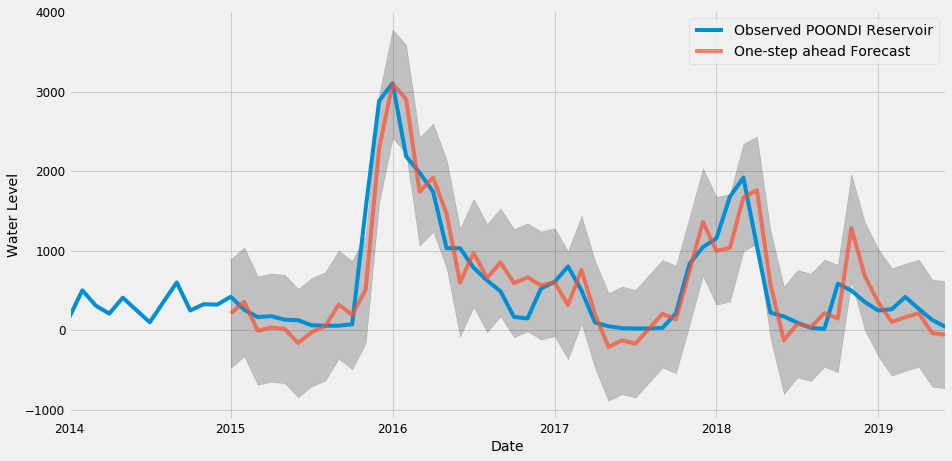

The Mean Squared Error of our forecasts is 96736.55
The Root Mean Squared Error of our forecasts is 311.02


In [191]:
pred = results_a.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = a['2014':].plot(label='Observed POONDI Reservoir')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Water Level')
plt.legend()

plt.show()

a_forecasted = pred.predicted_mean
a_truth = a['2017-01-01':]

# Compute the mean square error
mse = ((a_forecasted - a_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

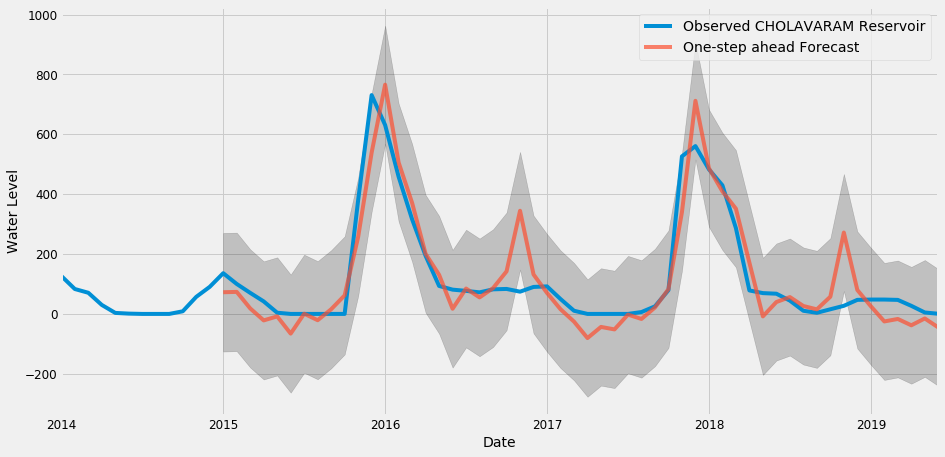

The Mean Squared Error of our forecasts is 5737.34
The Root Mean Squared Error of our forecasts is 75.75


In [192]:
pred = results_b.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = b['2014':].plot(label='Observed CHOLAVARAM Reservoir')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Water Level')
plt.legend()

plt.show()
b_forecasted = pred.predicted_mean
b_truth = b['2017-01-01':]

# Compute the mean square error
mse = ((b_forecasted - b_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

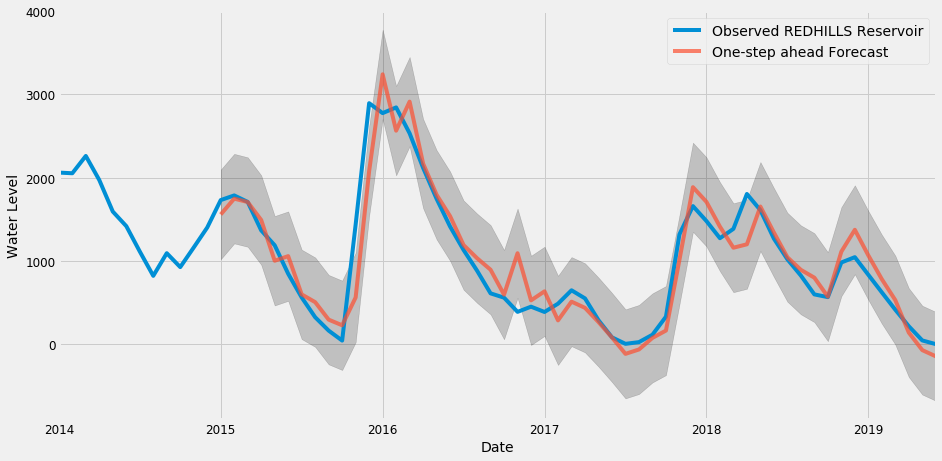

The Mean Squared Error of our forecasts is 37708.46
The Root Mean Squared Error of our forecasts is 194.19


In [193]:
pred = results_c.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = c['2014':].plot(label='Observed REDHILLS Reservoir')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Water Level')
plt.legend()

plt.show()
c_forecasted = pred.predicted_mean
c_truth = c['2017-01-01':]

# Compute the mean square error
mse = ((c_forecasted - c_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

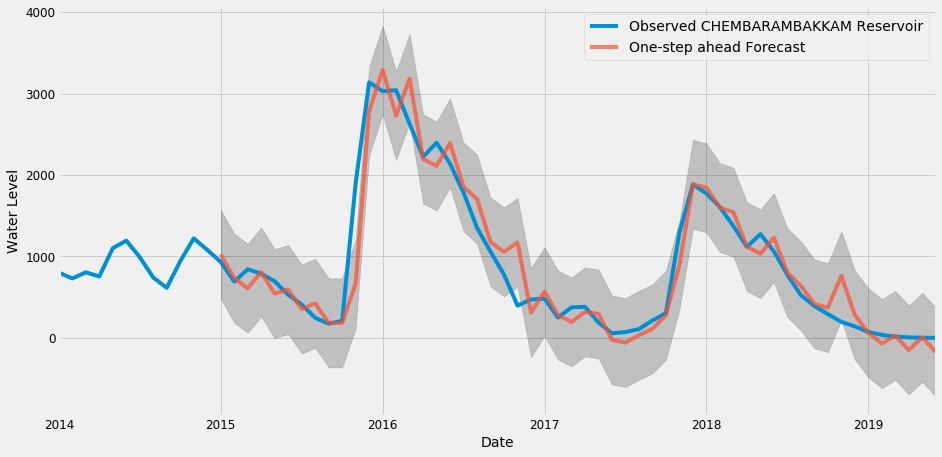

The Mean Squared Error of our forecasts is 26749.36
The Root Mean Squared Error of our forecasts is 163.55


In [187]:
pred = results_d.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = d['2014':].plot(label='Observed CHEMBARAMBAKKAM Reservoir')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Water Level')
plt.legend()

plt.show()


d_forecasted = pred.predicted_mean
d_truth = d['2017-01-01':]

# Compute the mean square error
mse = ((d_forecasted - d_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

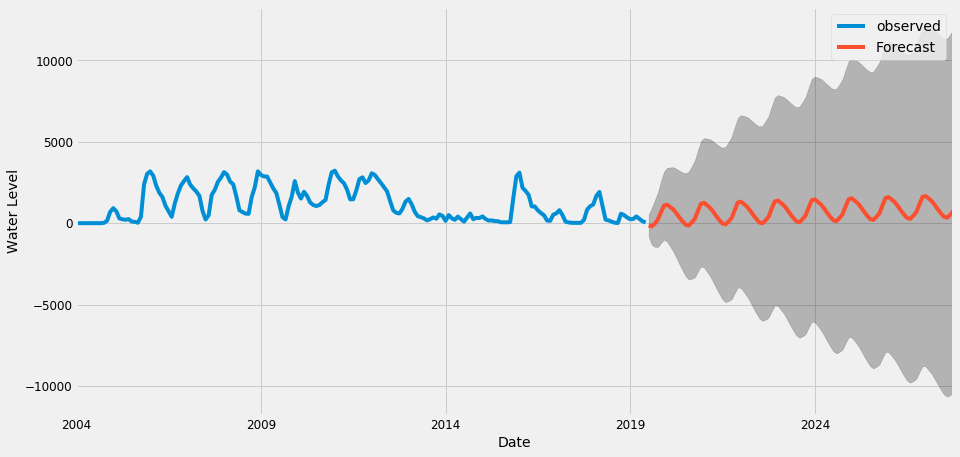

In [200]:
pred_uc = results_a.get_forecast(steps=100)

# pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = a.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Water Level')

plt.legend()
plt.show()

In [253]:
rf = pd.read_csv("C:/Users/Swaraj/Downloads/chennai-water-management/chennai_reservoir_rainfall.csv")
# furniture = df.loc[df['Category'] == 'Furniture']
rf["Date"] = pd.to_datetime(rf["Date"], format='%d-%m-%Y')

In [257]:
df.head()

,Date,REDHILLS
0,2004-01-01,268.0
1,2004-01-02,268.0
2,2004-01-03,267.0
3,2004-01-04,267.0
4,2004-01-05,267.0


In [254]:
df.shape, rf.shape

((5647, 5), (5647, 5))

In [259]:
# cols = ['POONDI', 'CHOLAVARAM', 'CHEMBARAMBAKKAM']
# df.drop(cols, axis=1, inplace=True)
# rf.drop(cols, axis=1, inplace=True)

df = df.sort_values('Date')
rf = rf.sort_values('Date')

df = df.groupby('Date')['REDHILLS'].sum().reset_index()
rf = rf.groupby('Date')['REDHILLS'].sum().reset_index()

In [262]:
df = df.sort_values('Date')
rf = rf.sort_values('Date')
df = df.groupby('Date')['REDHILLS'].sum().reset_index()
rf = rf.groupby('Date')['REDHILLS'].sum().reset_index()

Have a quick peek, perfect!

In [263]:
df.head()

,Date,REDHILLS
0,2004-01-01,268.0
1,2004-01-02,268.0
2,2004-01-03,267.0
3,2004-01-04,267.0
4,2004-01-05,267.0


In [264]:
rf.head()

,Date,REDHILLS
0,2004-01-01,0.0
1,2004-01-02,0.0
2,2004-01-03,0.0
3,2004-01-04,0.0
4,2004-01-05,0.0


In [265]:
df = df.set_index('Date')
rf = rf.set_index('Date')


c_df = df['REDHILLS'].resample('MS').mean()
c_rf = rf['REDHILLS'].resample('MS').mean()


df = pd.DataFrame({'Date':c_df.index, 'REDHILLS':c_df.values})
rf = pd.DataFrame({'Date': c_rf.index, 'REDHILLS': c_rf.values})

waterlvl = df.merge(rf, how='inner', on='Date')
waterlvl.rename(columns={'REDHILLS_x': 'REDHILLS_df', 'REDHILLS_y': 'REDHILLS_rf'}, inplace=True)
waterlvl.head()

,Date,REDHILLS_df,REDHILLS_rf
0,2004-01-01,252.161290,0.612903
1,2004-02-01,188.275862,0.000000
2,2004-03-01,158.612903,0.000000
3,2004-04-01,178.236667,0.000000
4,2004-05-01,147.009677,7.903226


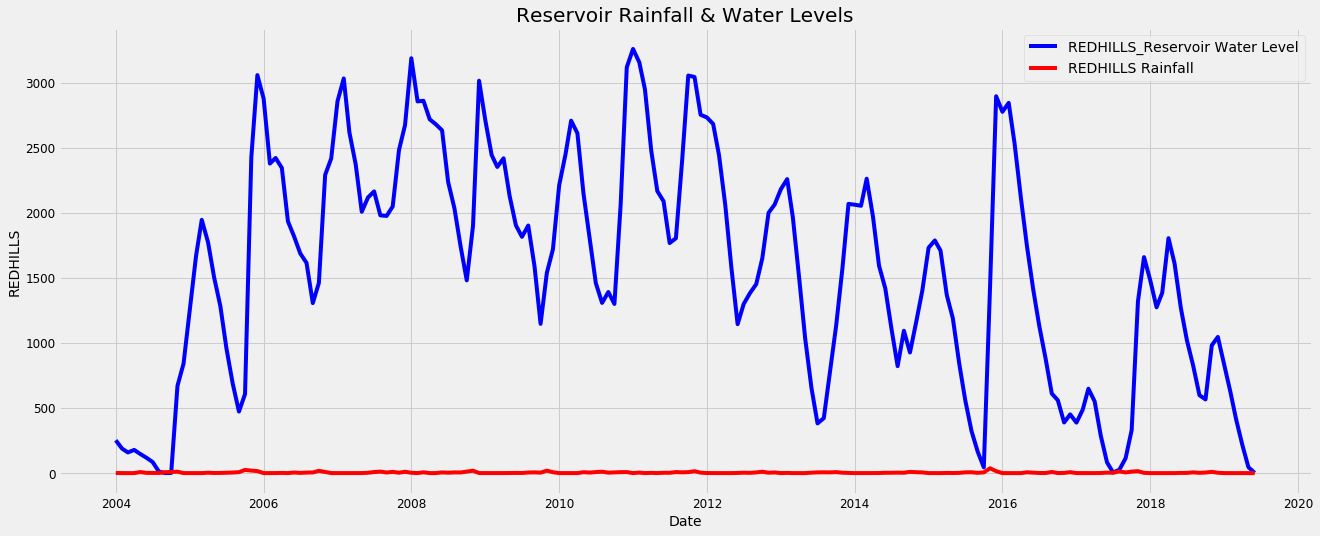

In [268]:

# a_lvl.plot(figsize=(15,5), label ="POONDI_LVL",color ='magenta') 
# b_lvl.plot(figsize=(15,5), label ="CHOLAVARAM_LVL")
# c_lvl.plot(figsize=(15,5), label ="REDHILLS_LVL") 
# d_lvl.plot(figsize=(15,5), label ="CHEMBARAMBAKKAM_LVL")

# a_rf.plot(figsize=(15,5), label ="POONDI_RF") 
# b_rf.plot(figsize=(15,5), label ="CHOLAVARAM_RF")
# c_rf.plot(figsize=(15,5), label ="REDHILLS_RF") 
# d_rf.plot(figsize=(15,5), label ="CHEMBARAMBAKKAM_RF",color ='green')



# # plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
# #            ncol=2, mode="expand", borderaxespad=0.)

# # plt.show()



plt.figure(figsize=(20, 8))
plt.plot(waterlvl['Date'], waterlvl['REDHILLS_df'], 'b-', label = 'REDHILLS_Reservoir Water Level')
plt.plot(waterlvl['Date'], waterlvl['REDHILLS_rf'], 'r-', label = 'REDHILLS Rainfall')
plt.xlabel('Date'); plt.ylabel('Water Lvl'); plt.title('Reservoir Rainfall & Water Levels')
plt.legend();


### Time Series Modeling with Prophet


In [271]:
from fbprophet import Prophet

df = df.rename(columns={'Date': 'ds', 'REDHILLS': 'y'})
df_model = Prophet(interval_width=0.95)
df_model.fit(df)

rf = rf.rename(columns={'Date': 'ds', 'REDHILLS': 'y'})
rf_model = Prophet(interval_width=0.95)
rf_model.fit(rf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [272]:
df_forecast = df_model.make_future_dataframe(periods=36, freq='MS')
df_forecast = df_model.predict(df_forecast)

rf_forecast = rf_model.make_future_dataframe(periods=36, freq='MS')
rf_forecast = rf_model.predict(rf_forecast)

<Figure size 1296x432 with 0 Axes>

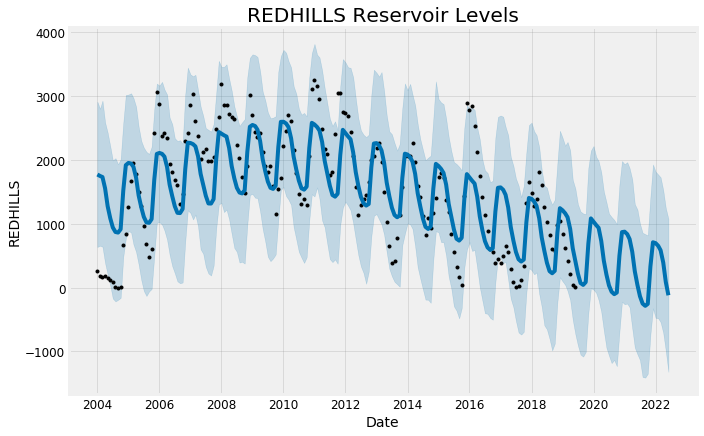

In [273]:
plt.figure(figsize=(18, 6))
df_model.plot(df_forecast, xlabel = 'Date', ylabel = 'REDHILLS')
plt.title('REDHILLS Reservoir Levels');

<Figure size 1296x432 with 0 Axes>

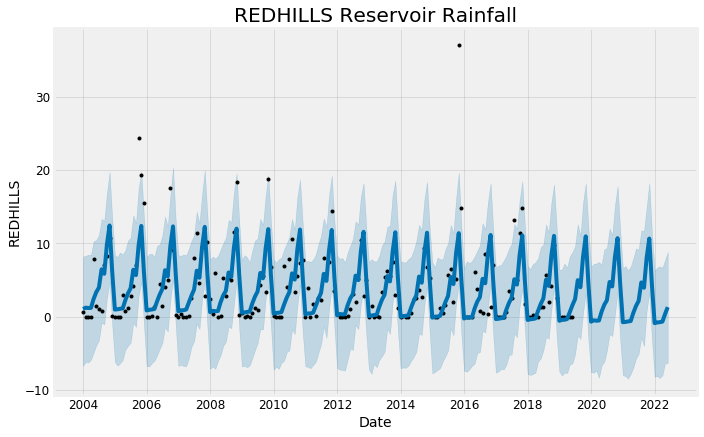

In [274]:
plt.figure(figsize=(18, 6))
rf_model.plot(rf_forecast, xlabel = 'Date', ylabel = 'REDHILLS')
plt.title('REDHILLS Reservoir Rainfall');

### Compare Forecasts

Forecasts for three years for these two categories into the future.Now, join them together to compare their future forecasts.

In [275]:
df_names = ['df_%s' % column for column in df_forecast.columns]
rf_names = ['rf_%s' % column for column in rf_forecast.columns]

merge_df_forecast = df_forecast.copy()
merge_rf_forecast = rf_forecast.copy()

merge_df_forecast.columns = df_names
merge_rf_forecast.columns = rf_names

forecast = pd.merge(merge_df_forecast, merge_rf_forecast, how = 'inner', left_on = 'df_ds', right_on = 'rf_ds')

forecast = forecast.rename(columns={'df_ds': 'Date'}).drop('rf_ds', axis=1)
forecast.head()

,Date,df_trend,df_yhat_lower,df_yhat_upper,df_trend_lower,df_trend_upper,df_additive_terms,df_additive_terms_lower,df_additive_terms_upper,df_yearly,...,rf_additive_terms,rf_additive_terms_lower,rf_additive_terms_upper,rf_yearly,rf_yearly_lower,rf_yearly_upper,rf_multiplicative_terms,rf_multiplicative_terms_lower,rf_multiplicative_terms_upper,rf_yhat
0,2004-01-01,1270.646568,636.432390,2912.731876,1270.646568,1270.646568,500.816376,500.816376,500.816376,500.816376,...,-3.607206,-3.607206,-3.607206,-3.607206,-3.607206,-3.607206,0.0,0.0,0.0,1.066794
1,2004-02-01,1284.429106,656.123831,2800.743814,1284.429106,1284.429106,464.418720,464.418720,464.418720,464.418720,...,-3.414946,-3.414946,-3.414946,-3.414946,-3.414946,-3.414946,0.0,0.0,0.0,1.249906
2,2004-03-01,1297.322449,640.061406,2928.803554,1297.322449,1297.322449,434.476827,434.476827,434.476827,434.476827,...,-3.456030,-3.456030,-3.456030,-3.456030,-3.456030,-3.456030,0.0,0.0,0.0,1.200265
3,2004-04-01,1311.104987,384.243118,2586.477742,1311.104987,1311.104987,243.171473,243.171473,243.171473,243.171473,...,-3.424333,-3.424333,-3.424333,-3.424333,-3.424333,-3.424333,0.0,0.0,0.0,1.222814
4,2004-05-01,1324.442927,206.811408,2427.391478,1324.442927,1324.442927,-49.060735,-49.060735,-49.060735,-49.060735,...,-2.213865,-2.213865,-2.213865,-2.213865,-2.213865,-2.213865,0.0,0.0,0.0,2.424430


### Visualizing the trend and the forecast

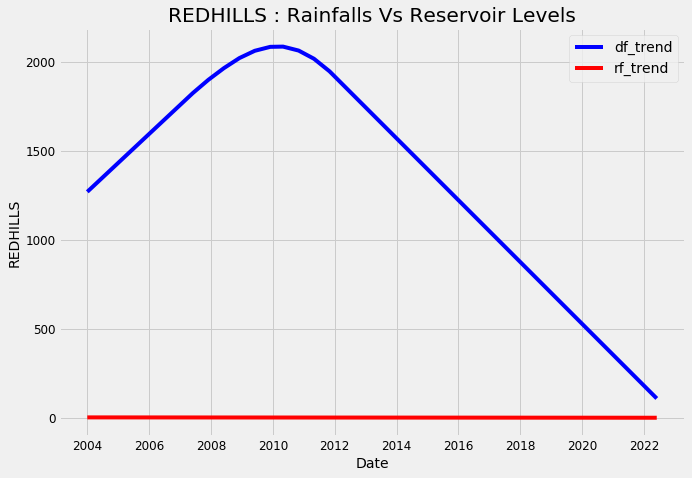

In [276]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['df_trend'], 'b-')
plt.plot(forecast['Date'], forecast['rf_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('REDHILLS')
plt.title('REDHILLS : Rainfalls Vs Reservoir Levels');

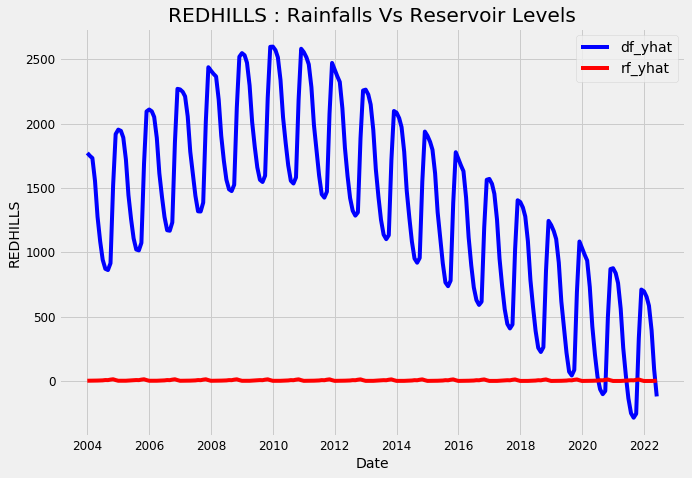

In [277]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['df_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['rf_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('REDHILLS')
plt.title('REDHILLS : Rainfalls Vs Reservoir Levels');

### Trends and Patterns

Using Prophet Models to inspect different trends of these two categories in the data.

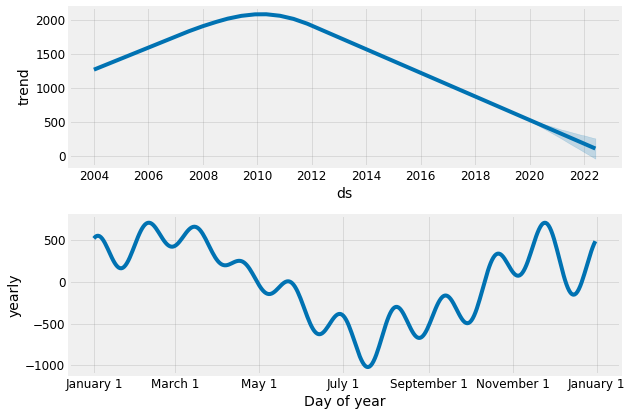

In [278]:
df_model.plot_components(df_forecast);

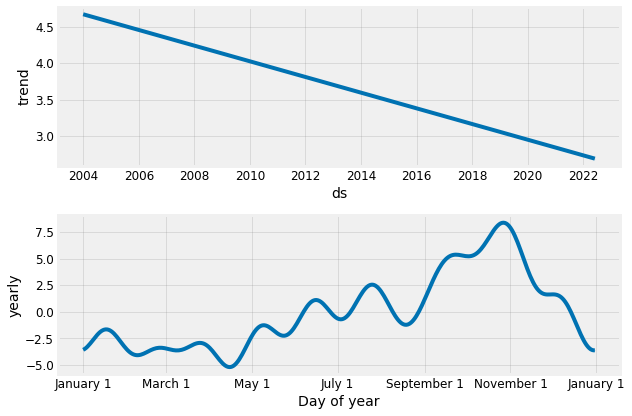

In [279]:
rf_model.plot_components(rf_forecast);